0.01
0
1288306.20339


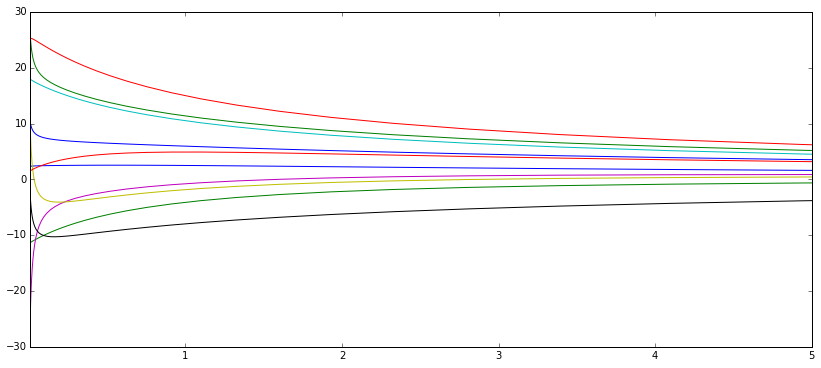

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn import preprocessing
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.cross_validation import train_test_split
%matplotlib inline

diabetes = load_diabetes()
X = diabetes.data#[:150]
y = diabetes.target#[:150]
X_train, X_test,y_train, y_test = train_test_split(X,y,random_state=42)

k = X_train.shape[1]
alphas = np.logspace(-2, 2)
params = np.zeros((len(alphas), k))
RTrainerrors = np.zeros(len(alphas))
RTesterrors = np.zeros(len(alphas))

for i,a in enumerate(alphas):
    X_data = preprocessing.scale(X_train)
    fit = Ridge(alpha=a, normalize=True).fit(X_data, y_train)
    yhat = fit.predict(preprocessing.scale(X_test))
    RTesterrors[i] = np.sum((yhat - y_test)**2)
    RTrainerrors[i] = np.sum((fit.predict(X_data) - y_train)**2)
    params[i] = fit.coef_

Rerrors = RTesterrors + RTrainerrors
print alphas[Rerrors.argmin()]
print Rerrors.argmin()
print Rerrors.min()

plt.figure(figsize=(14,6))
plt.xlim(alphas.min(),5)
for param in params.T:
    plt.plot(alphas, param)

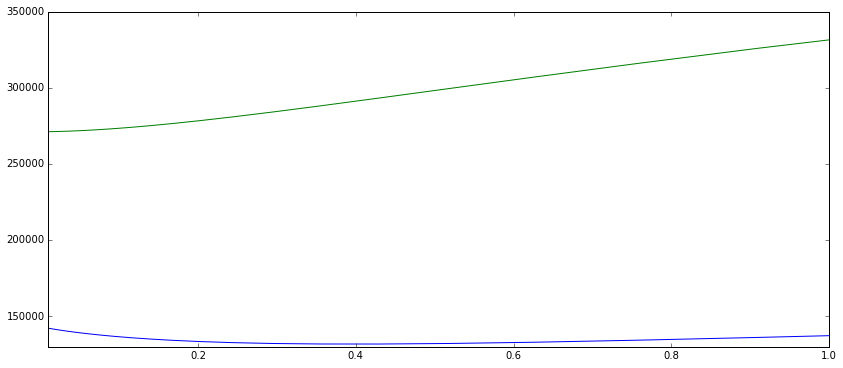

In [79]:
plt.figure(figsize=(14,6))
plt.xlim(alphas.min(),1)
plt.ylim(130000,350000)
plt.plot(alphas, RTesterrors)
plt.plot(alphas, RTrainerrors)
plt.show()

0.1
0
1294549.52473


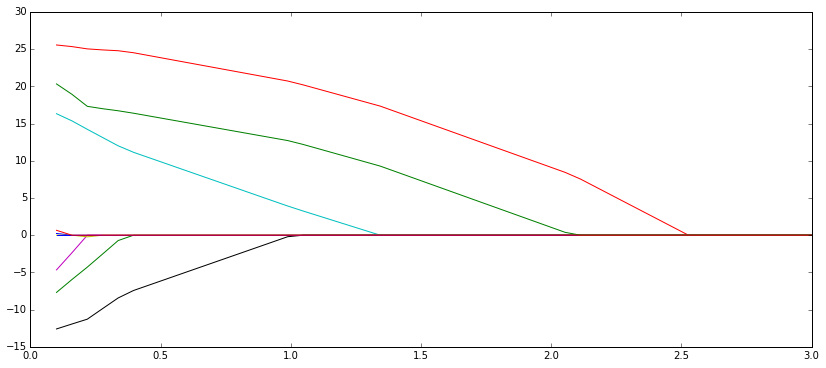

In [96]:
k = X.shape[1]
alphas = np.linspace(0.1, 3)
params = np.zeros((len(alphas), k))

diabetes = load_diabetes()
X = diabetes.data#[:150]
y = diabetes.target#[:150]
X_train, X_test,y_train, y_test = train_test_split(X,y,random_state=42)

LTrainerrors = np.zeros(len(alphas))
LTesterrors = np.zeros(len(alphas))

for i,a in enumerate(alphas):
    X_data = preprocessing.scale(X_train)
    fit = Lasso(alpha=a, normalize=True).fit(X_data, y_train)
    yhat = fit.predict(preprocessing.scale(X_test))
    LTesterrors[i] = np.sum((yhat - y_test)**2)
    LTrainerrors[i] = np.sum((fit.predict(X_data) - y_train)**2)
    params[i] = fit.coef_

Lerrors = LTesterrors + LTrainerrors
print alphas[Lerrors.argmin()]
print Lerrors.argmin()
print Lerrors.min()
    
plt.figure(figsize=(14,6))
for param in params.T:
    plt.plot(alphas, param)

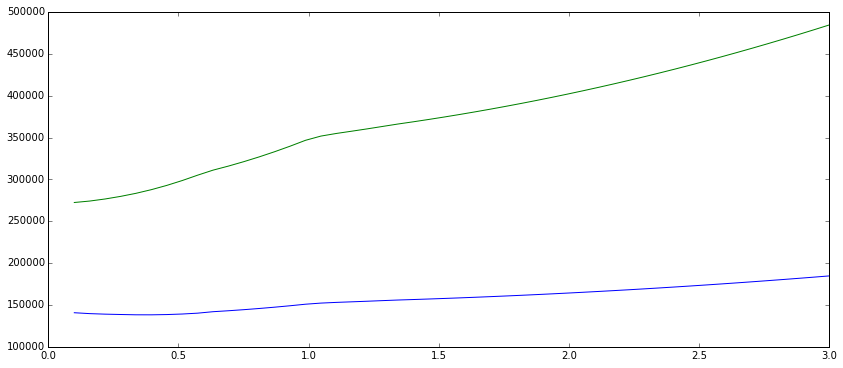

In [87]:
plt.figure(figsize=(14,6))
plt.plot(alphas, LTesterrors)
plt.plot(alphas, LTrainerrors)
plt.show()

In [100]:
diabetes = load_diabetes()
X = diabetes.data#[:150]
y = diabetes.target#[:150]
X_train, X_test,y_train, y_test = train_test_split(X,y,random_state=42)

X_data = preprocessing.scale(X_train)
fit = LinearRegression(normalize=True).fit(X_data, y_train)
yhat = fit.predict(preprocessing.scale(X_test))
Testerror = np.sum((yhat - y_test)**2)
Trainerror = np.sum((fit.predict(X_data) - y_train)**2)

error = Testerror + Trainerror
print error

1289015.77755
